In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Load Data

In [2]:
df = pd.read_csv('../zuu crew scores.csv')
df = df[df['CourseName']=='Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [3]:
X = df['Attendance'].values.reshape(-1,1)
Y = df['CapstoneScore'].values

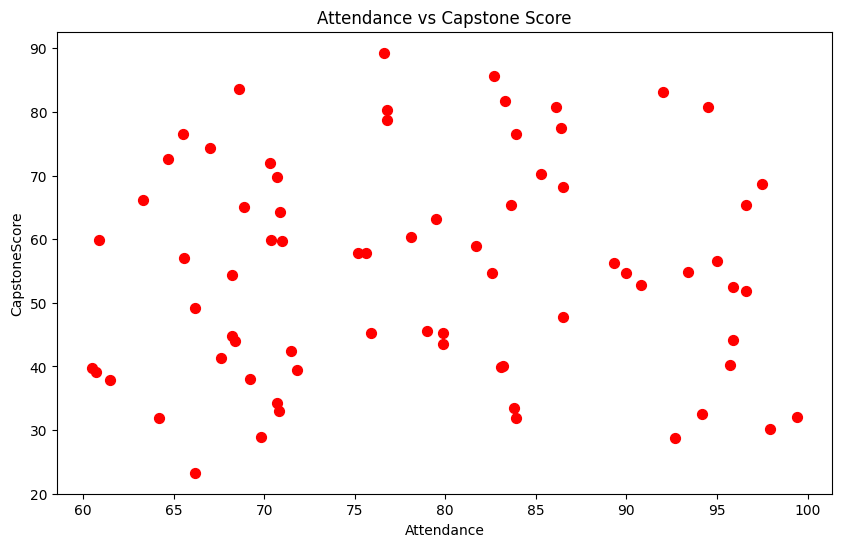

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y,color='red',s=50)
plt.xlabel('Attendance')
plt.ylabel('CapstoneScore')
plt.title('Attendance vs Capstone Score')
plt.show()

#### Compute Cost

In [5]:
def compute_cost(X,beta,Y):
    y_hat = X.dot(beta) 
    m = len(Y)
    cost = (1 /(2 * m)) * np.sum((y_hat - Y)**2)
    return cost

#### Optimize parameters and  Calculate partial derivatives

In [6]:
def gradient_descent(X,Y,beta,n_iter,lr):
    m = len(Y)
    cost_history=[]

    for i in range(n_iter):
        y_hat = X.dot(beta) 
        gradient = (1/m) * X.T.dot(y_hat - Y)
        beta = beta - lr * gradient
        cost  = compute_cost(X,beta,Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"iteration: {i}, beta:{beta}, cost:{cost}")
    
    return beta


In [7]:
X_with_bias = np.column_stack([np.ones(len(X)),X])
beta = np.random.randn(2)
n_iter = 10000
lr = 0.0001

In [8]:
beta = gradient_descent(X_with_bias,Y,beta,n_iter,lr)

iteration: 0, beta:[-0.23212994 -0.20861557], cost:2723.918686049857
iteration: 100, beta:[-0.21099347  0.68900101], cost:167.8623055745219
iteration: 200, beta:[-0.20102105  0.68887702], cost:167.85235913708595
iteration: 300, beta:[-0.1910506   0.68875305], cost:167.84241662172676
iteration: 400, beta:[-0.18108212  0.6886291 ], cost:167.8324780268977
iteration: 500, beta:[-0.1711156   0.68850518], cost:167.82254335105293
iteration: 600, beta:[-0.16115105  0.68838129], cost:167.81261259264704
iteration: 700, beta:[-0.15118846  0.68825742], cost:167.8026857501353
iteration: 800, beta:[-0.14122783  0.68813357], cost:167.79276282197364
iteration: 900, beta:[-0.13126917  0.68800975], cost:167.78284380661856
iteration: 1000, beta:[-0.12131247  0.68788596], cost:167.7729287025271
iteration: 1100, beta:[-0.11135774  0.68776218], cost:167.76301750815705
iteration: 1200, beta:[-0.10140497  0.68763844], cost:167.75311022196664
iteration: 1300, beta:[-0.09145416  0.68751471], cost:167.7432068424

In [9]:
x_min,x_max = float(np.min(X)), float(np.max(X))
x_intervel = np.linspace(x_min,x_max,100)
x_intervel_with_bias = np.column_stack([np.ones((len(x_intervel))), x_intervel])
y_hat_intervel = x_intervel_with_bias.dot(beta)


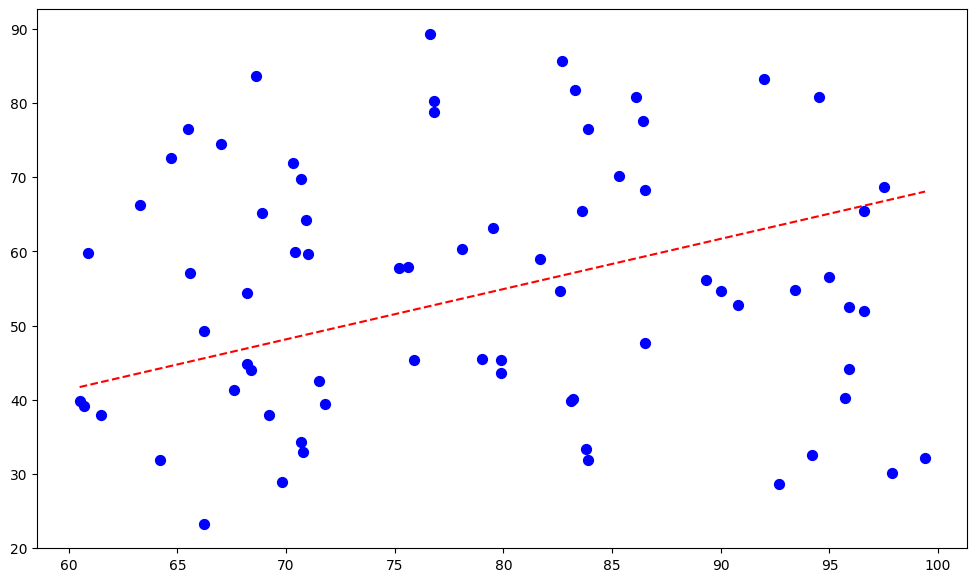

In [10]:
plt.figure(figsize=(12, 7))
plt.scatter(X, Y, color='blue', s=50)
plt.plot(x_intervel,y_hat_intervel,'r--', label="fitted line")
plt.show()

####  Make predictions

In [11]:
def Predict(X):
    X = np.array([1,X])
    y_predict = X.dot(beta)
    return y_predict

In [12]:
Predict(83.2)

np.float64(57.080189657223706)

#### Model Evaluation

In [13]:
Y_hat = X_with_bias.dot(beta) 
Y_hat

array([54.84660172, 52.74838274, 66.14991039, 57.08018966, 59.3137776 ,
       52.61301377, 57.48629656, 61.68273451, 47.06288616, 65.67611901,
       46.9275172 , 46.5214103 , 42.39265683, 56.67408276, 53.62828102,
       45.57382753, 64.72853625, 48.68731376, 45.57382753, 59.24609312,
       47.40130858, 47.60436203, 44.22013787, 63.03642417, 59.04303967,
       64.5254828 , 52.13922239, 46.9275172 , 65.67611901, 41.715812  ,
       57.14787414, 65.54075004, 63.51021555, 48.41657582, 51.66543101,
       57.35092759, 48.61962927, 49.36415859, 67.02980867, 54.57586378,
       41.98654993, 48.61962927, 56.06492241, 58.5015638 , 48.34889134,
       45.16772064, 63.98400693, 68.04507592, 48.75499824, 41.85118096,
       44.55856029, 57.01250517, 48.82268272, 45.10003615, 65.06695866,
       57.55398104, 46.1153034 , 66.14991039, 52.74838274, 43.61097752,
       48.01046892, 51.93616894, 49.16110514, 56.74176724, 54.23744137,
       59.3137776 , 66.75907074, 61.20894313, 47.19825513, 54.84

In [14]:
def MSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(e_i**2)

def MAE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(np.abs(e_i))

def R2_Score(Y,Y_hat):
    y_mean = np.mean(Y)
    e_i = Y - Y_hat
    std_i = Y - y_mean

    E = np.sum(e_i**2) / np.sum(std_i ** 2)
    return 1 - E

def RMSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.sqrt(np.mean((Y - Y_hat) ** 2))


In [15]:
mse = MSE(Y, Y_hat)
mae = MAE(Y, Y_hat)
r2 = R2_Score(Y, Y_hat)
rmse = RMSE(Y,Y_hat)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")
print(f"RMSE : {rmse}")

MSE : 333.79297928119263
MAE : 15.338431616217555
R2 Score : -0.1682160026076529
RMSE : 18.270002169709578
